# Email Spam Detection

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [3]:
# Load the dataset
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [4]:
# Drop unnecessary columns
df.drop("Unnamed: 2", axis=1, inplace=True)
df.drop("Unnamed: 3", axis=1, inplace=True)
df.drop("Unnamed: 4", axis=1, inplace=True)

In [5]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [8]:
df.shape

(5572, 2)

In [9]:
df.size

11144

In [10]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [12]:
df.nunique()

v1       2
v2    5169
dtype: int64

In [13]:
df.groupby('v1').count()

,v2
v1,
ham,4825
spam,747


In [14]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

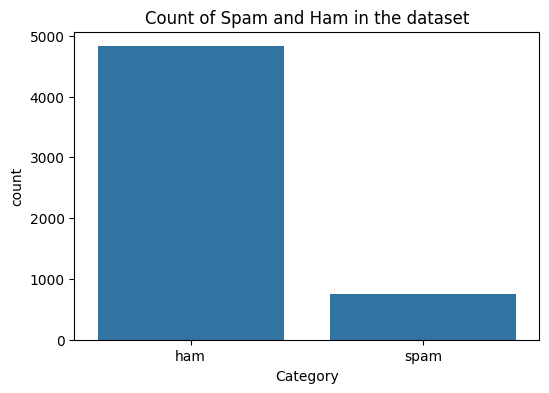

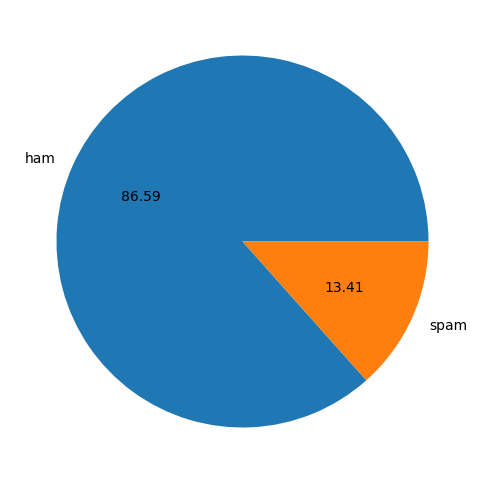

In [15]:
# Count plot of spam and ham
plt.figure(figsize=(6, 4))
sns.countplot(x=df['v1'])
plt.title("Count of Spam and Ham in the dataset")
plt.xlabel("Category")
plt.show()

# Pie chart showing the distribution of spam and ham
plt.figure(figsize=(6, 8))
plt.pie(df['v1'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()


In [16]:
lb = LabelEncoder()
df['v1'] = lb.fit_transform(df['v1'])
df['v1'].head()

0    0
1    0
2    1
3    0
4    0
Name: v1, dtype: int32

In [17]:
tn = RegexpTokenizer(r'[a-zA-Z0-9]')
x = df['v2'].values
y = df['v1'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4179,) (1393,) (4179,) (1393,)


In [18]:
cv = CountVectorizer()
x_train = cv.fit_transform(x_train)
x_test = cv.transform(x_test)

In [19]:
c = LogisticRegression()
c.fit(x_train, y_train)

LogisticRegression()

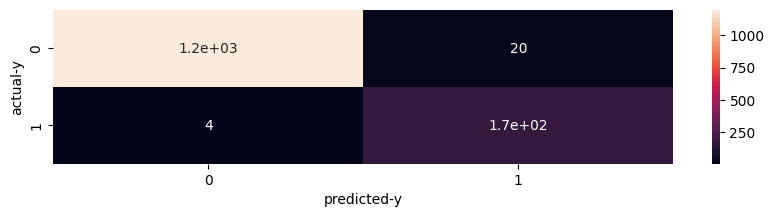

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1219
           1       0.89      0.98      0.93       174

    accuracy                           0.98      1393
   macro avg       0.95      0.98      0.96      1393
weighted avg       0.98      0.98      0.98      1393

accuracy-score 0.9827709978463748
Model score 0.9827709978463748


In [20]:
y_pred = c.predict(x_test)

cm = confusion_matrix(y_pred, y_test)
plt.figure(figsize=(10, 2))
sns.heatmap(cm, annot=True)
plt.xlabel('predicted-y')
plt.ylabel('actual-y')
plt.show()

print(classification_report(y_pred, y_test))
print('accuracy-score', accuracy_score(y_pred, y_test))
print('Model score', c.score(x_test, y_test))


In [21]:
# Save the model to a file
with open("email_spam_detection.pkl", "wb") as model_file:
    pickle.dump(c, model_file)

# Load the model for later use
loaded_model = pickle.load(open("email_spam_detection.pkl", "rb"))

# Evaluate the loaded model
loaded_model.score(x_test, y_test)


0.9827709978463748

In [22]:
# Load the dataset
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1, inplace=True)
df['v1'] = df['v1'].map({'ham': 0, 'spam': 1})

# Tokenization and feature extraction
vectorizer = TfidfVectorizer(sublinear_tf=True, encoding='utf-8', decode_error='ignore')
X = vectorizer.fit_transform(df['v2'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['v1'], test_size=0.25, random_state=42)

# Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
print("Multinomial Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, nb_pred))
print("Classification Report:\n", classification_report(y_test, nb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_pred))

# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("\nSupport Vector Machine:")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("Classification Report:\n", classification_report(y_test, svm_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))

# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))

# Gradient Boosting (XGBoost)
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print("\nGradient Boosting (XGBoost):")
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("Classification Report:\n", classification_report(y_test, xgb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))


Multinomial Naive Bayes:
Accuracy: 0.9576453697056713
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      1202
           1       1.00      0.69      0.82       191

    accuracy                           0.96      1393
   macro avg       0.98      0.85      0.90      1393
weighted avg       0.96      0.96      0.95      1393

Confusion Matrix:
 [[1202    0]
 [  59  132]]

Support Vector Machine:
Accuracy: 0.9727207465900933
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1202
           1       1.00      0.80      0.89       191

    accuracy                           0.97      1393
   macro avg       0.98      0.90      0.94      1393
weighted avg       0.97      0.97      0.97      1393

Confusion Matrix:
 [[1202    0]
 [  38  153]]

Random Forest Classifier:
Accuracy: 0.9770279971284996
Classification Report:
               prec

In [23]:
# Save the Logistic Regression model
with open("email_spam_detection_logistic_regression.pkl", "wb") as model_file:
    pickle.dump(nb_model, model_file)


In [24]:
# Load the Logistic Regression model
loaded_model = pickle.load(open("email_spam_detection_logistic_regression.pkl", "rb"))

# Test the model with example features
example_messages = [
    "Congratulations, you've won a prize!",
    "Hello, how are you doing today?"
]

# Tokenize and transform the example messages
example_messages_transformed = vectorizer.transform(example_messages)

# Predict spam or ham for the example messages
predictions = loaded_model.predict(example_messages_transformed)

# Print the predictions
for message, prediction in zip(example_messages, predictions):
    print(f"Message: {message}")
    print(f"Predicted: {'spam' if prediction == 1 else 'ham'}")
    print()


Message: Congratulations, you've won a prize!
Predicted: spam

Message: Hello, how are you doing today?
Predicted: ham

